In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [6]:
def draw_value(curr_sum):
    tmp_val = np.random.choice(np.arange(2 , 12))
    if tmp_val>10:
        if tmp_val + curr_sum > 21:
            return  curr_sum + 1
        else:
            return curr_sum + 11       
    else:
        return curr_sum + tmp_val

In [7]:
def player_policy_play_is_true(tmp_val):
    return tmp_val < 20

def dealer_policy_play_is_true(tmp_val):
    return tmp_val < 17

def game_continues(tmp_val):
    return tmp_val < 22

def return_usable_non_usable_index(tmp_tupple):
    return 1 if tmp_tupple[4] else 0

In [8]:
def play_a_game(policy_function):
    
    states_array = np.zeros(22)
    #returns_array = np.zeros(22)
    player_states_list = []
    cum_sum = draw_value(0)
    player_states_list.append(cum_sum)
    bust = False
    
    while policy_function(cum_sum) and game_continues(cum_sum):
        cum_sum = draw_value(cum_sum)
        if game_continues(cum_sum):
            player_states_list.append(cum_sum)
        else:
            bust = True
    states_array[player_states_list] += 1
    #returns_array[player_states_list] += bust
    tmp_player_stat_list = (player_states_list.copy())
    tmp_player_stat_list.insert(0,0)
    tmp_usable_ace = np.sum(np.diff(tmp_player_stat_list) == 11) >0
    return  (bust, player_states_list , len(player_states_list), states_array, tmp_usable_ace )

In [9]:
states_visits_array = np.ones((2,22,12))
states_returns_array = np.zeros((2, 22,12))

In [10]:
for cnt in range(10000):
    players_game = play_a_game (player_policy_play_is_true)
    usable_index = return_usable_non_usable_index(players_game)
    dealers_game = play_a_game (dealer_policy_play_is_true)
    states_visits_array[usable_index, :,dealers_game[1][0] ] += players_game[3]
    
    if players_game[0]:
      states_returns_array[usable_index, :,dealers_game[1][0] ] += (players_game[3]* -1)
    else:        
        if dealers_game[0]:
            states_returns_array[usable_index, :,dealers_game[1][0] ] += players_game[3]            
        elif players_game[1][-1] > dealers_game[1][-1]:
            states_returns_array[usable_index, :,dealers_game[1][0] ] += players_game[3]
        elif players_game[1][-1] < dealers_game[1][-1]:
            states_returns_array[usable_index, :,dealers_game[1][0] ] += (players_game[3]* -1)
        else:
            if (players_game[1][-1] == 21) and (players_game[2] == 2) and (dealers_game[2] > 2):
                states_returns_array[usable_index, :,dealers_game[1][0] ] += players_game[3]

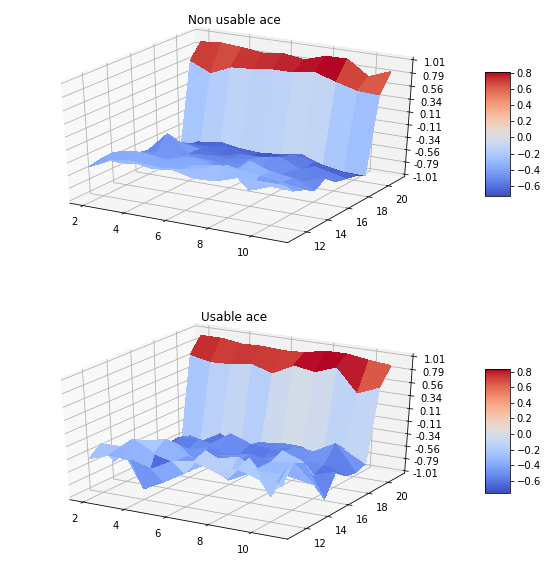

In [11]:


fig = plt.figure(figsize=(10, 10))#(figsize=plt.figaspect(1))
ax = fig.add_subplot(211, projection='3d')
ax.set_title('Non usable ace')
# Make data.

X = np.arange(2,12)
Y = np.arange(11,22)
X, Y = np.meshgrid(Y, X)

#R = np.sqrt(X**2 + Y**2)
Z = ( states_returns_array[0].T / states_visits_array[0].T)[2:, 11:]

 
# Plot the surface.
surface = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)


# Customize the z axis.

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.

fig.colorbar(surface , shrink=0.5, aspect=5)

ax = fig.add_subplot(212, projection='3d')
ax.set_title('Usable ace')
surface2 = ax.plot_surface(Y, X, ( states_returns_array[1].T / states_visits_array[1].T)[2:, 11:], cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surface2 , shrink=0.5, aspect=5)

plt.show()
